In [8]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import image
import sys
file_name1 = "./data/image.png"
file_name2 = "./data/imageSmall.png"

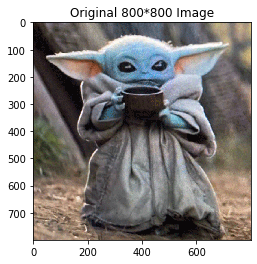

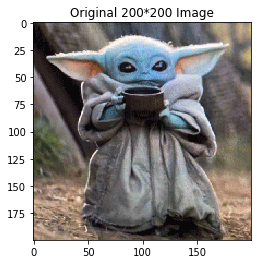

In [33]:
img = image.imread(file_name1)
imgSmall = image.imread(file_name2)
plt.title("Original 800*800 Image")
plt.imshow(img)
plt.show()
plt.title("Original 200*200 Image")
plt.imshow(imgSmall)
plt.show()
image.imsave("test", img, format='png')


In [10]:
img_reshaped = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))
colors_in_img = np.unique(img_reshaped, return_counts=False)
print("There are ",len(colors_in_img)," different colors in img")

imgSmall_reshaped = imgSmall.reshape((imgSmall.shape[0]*imgSmall.shape[1], imgSmall.shape[2]))
colors_in_imgSmall = np.unique(imgSmall_reshaped, return_counts=False)
print("There are ",len(colors_in_imgSmall)," different colors in imgSmall")




There are  198  different colors in img
There are  195  different colors in imgSmall


In [11]:
##This cell contains all the needed methods from kmeans program with some changes in kmeans to now show all
###all the details

def centroid_k_init(my_data, k):
    #the firs random centroid among dataset points
    
    print("initilizing centroids with kmeans++")
    centroids = [] 
    rand_point = np.random.randint(my_data.shape[0])
    centroids.append(my_data[rand_point])
   
    # compute remaining k - 1 centroids 
    for c_id in range(k - 1): 
          
        #initialize a list to store distances of data 
        #points from nearest centroid 
        dist = [] 
        for i in range(my_data.shape[0]): 
            point = my_data[i] 
            d = sys.maxsize 
              
            #compute distance of 'point' from each of the previou sly 
            #selected centroid and store the minimum distance 
            for j in range(len(centroids)): 
                # print("allaho akbarrr", point[0], centroids[j])
                temp_dist = np.linalg.norm(point-centroids[j])
                d = min(d, temp_dist) 
            dist.append(d) 
              
        #select data point with maximum distance as our next centroid 
        dist = np.array(dist) 
        next_centroid = my_data[np.argmax(dist)]
        centroids.append(next_centroid) 
        dist = [] 
        print("centroid :", c_id)
    return centroids 

def centroid_r_init(my_data, k):
    random_index = []
    random_centroids = []
    counter = 0
    while True:
        rand = np.random.randint(low=0, high=my_data.shape[0] - 1)
        
        if rand not in random_index:
            random_index.append(rand)
            counter += 1 
        if counter == k:
            break
        
    for index in random_index:
        random_centroids.append(my_data[index])
    
    print(len(random_centroids))
    return np.array(random_centroids)

        
def find_nearest_centroid(my_data, centroids):
    labels = []
    for data in my_data:
        min_dist = sys.maxsize
        c_index = 0
        for c in range(centroids.shape[0]):
            dist = np.linalg.norm(data-centroids[c])
            if dist < min_dist:
                min_dist = dist
                c_index = c
        labels.append(c_index)
        
    return labels

def find_new_centroids(my_data, labels, k, centroids):
    centroid_sum = np.zeros((k, my_data.shape[1]))
    count = np.zeros(k)
    change = True
    new_centroids = np.zeros((k, my_data.shape[1]))
    for i in range(my_data.shape[0]):
        c_index = labels[i]
        centroid_sum[c_index] = np.add(centroid_sum[c_index], my_data[i])
        count[c_index] +=1
    ##calculating new centroids!
    for i in range(k):
        if count[i] != 0:
            new_centroids[i] = centroid_sum[i]/count[i]
        else: 
            new_centroids[i] = centroids[i]
    
    if np.array_equal(new_centroids, centroids):
        change = False
    
    return new_centroids, change

def kmeans(my_data, k, init_method, iteration, convergence, details):
    
    if init_method == "k":
        
        centroids = np.array(centroid_k_init(my_data, k))
    elif init_method == "r":
        centroids = centroid_r_init(my_data, k)
    labels = []
    print("Kmeans starts")
    if convergence == True:##Stop condition is convergence of clusters
        change = True
        if details:
            print("kmeans will stop when convergence occure")
        counter = 0
        limit = 50 #If kmeans is running on convergence condition ther will be a limitation for iterations
        while change:
            if details:
                print("Iteration number: ", counter)
            labels = find_nearest_centroid(my_data, centroids)
            centroids, change = find_new_centroids(my_data, labels, k, centroids)
            counter += 1
            if counter > limit:
                print("Reached to the limit of :"+str(limit))
                break
    if convergence == False: ##Stop condition is number of iterations
        if details:
            print("kmeans will stop after given iterations")
        for i in range(iteration):
            if details:
                print("Iteration number :", i)
            labels = find_nearest_centroid(my_data, centroids)
            centroids, _ = find_new_centroids(my_data, labels, k, centroids)
    
    
    return centroids, labels

In [31]:
%time
##This is a function which gets the Original image and plot, and returns the compressed 
###It will also save the image in current path using PIL Image package
def image_compressor(original_image, k, kmeans_init_method):
    
    #X and Y are the height and width of picture and Z is RGB list
    x, y, z = original_image.shape
    
    reshaped_image = original_image.reshape((x*y, z))
    
    print(reshaped_image.shape)
    
    
    centroids, labels = kmeans(my_data= reshaped_image, k= k, init_method=kmeans_init_method, iteration= 0, convergence= True, details= True)
    
    how_many_labels = []
#     print(labels)
    print("centroids", centroids)
    print("length of centroids", len(centroids))
    for i in range(k):
        c = labels.count(str(k))
        how_many_labels.append(c)
    print("number iof labeksssss::  ",how_many_labels)
    
    
    new_image = np.zeros((x*y, z))
    print(new_image.shape)
    
    for i in range(new_image.shape[0]):
        
        new_image[i] = centroids[labels[i]]
    
    print("here we areee : ",np.unique(new_image, return_counts=False))
    
    #Here we reshape the new image array to get it ready for presentatoin
    new_image = new_image.reshape((x, y, z))
    print(new_image.shape)
    title_name = "Compressed Image with k= " + str(k)+ "for "+str(x)+"*"+str(y)+" image"
    plt.title(title_name)
    plt.imshow(new_image)
    plt.show()
    
    image_name = title_name+ ".png"
    image.imsave(image_name, new_image)
    
    return new_image
    

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


(40000, 3)
initilizing centroids with kmeans++
centroid : 0
centroid : 1
centroid : 2
centroid : 3
centroid : 4
centroid : 5
centroid : 6
centroid : 7
centroid : 8
centroid : 9
centroid : 10
centroid : 11
centroid : 12
centroid : 13
centroid : 14
Kmeans starts
kmeans will stop when convergence occure
Iteration number:  0
Iteration number:  1
Iteration number:  2
Iteration number:  3
Iteration number:  4
Iteration number:  5
Iteration number:  6
Iteration number:  7
Iteration number:  8
Iteration number:  9
Iteration number:  10
centroids [[0.36440263 0.35667916 0.3571682 ]
 [0.94098144 0.93067949 0.93281789]
 [0.474679   0.65594311 0.79197902]
 [0.75860066 0.64696229 0.54864371]
 [0.07546777 0.05845636 0.0640799 ]
 [0.67549172 0.75917895 0.84358303]
 [0.36637076 0.50846541 0.61231784]
 [0.52631799 0.44867882 0.37402283]
 [0.57618562 0.57012846 0.57655168]
 [0.17300673 0.14819625 0.1440508 ]
 [0.46901097 0.45582833 0.45994398]
 [0.82126383 0.81315228 0.82864293]
 [0.27438407 0.26472799 

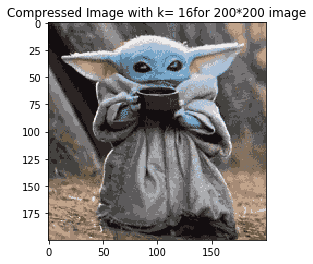

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 3.81 µs


In [32]:
new_image = image_compressor(imgSmall, 16, kmeans_init_method="k")
%time

In [19]:
count = np.unique(new_image, return_counts=False)
len(count)

48

In [ ]:
new_image = image_compressor(imgSmall, 256, kmeans_init_method="r")


(640000, 3)
16
Kmeans starts
kmeans will stop when convergence occure
Iteration number:  0
Iteration number:  1
Iteration number:  2
Iteration number:  3
Iteration number:  4
Iteration number:  5
Iteration number:  6
Iteration number:  7
Iteration number:  8
Iteration number:  9
Iteration number:  10
Iteration number:  11
Iteration number:  12
Iteration number:  13
Iteration number:  14
Iteration number:  15
Iteration number:  16
Iteration number:  17
Iteration number:  18
(640000, 3)
(800, 800, 3)


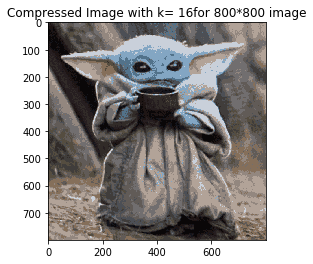

In [125]:
#now running compressor on large image
new_image = image_compressor(img, 16, kmeans_init_method="r")


(640000, 3)
256
Kmeans starts
kmeans will stop when convergence occure
Iteration number:  0
Iteration number:  1
Iteration number:  2
Iteration number:  3
Iteration number:  4
(640000, 3)
(800, 800, 3)


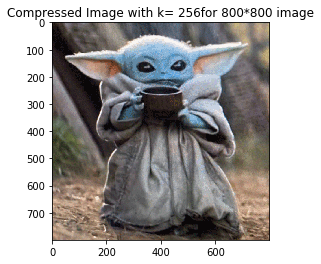

In [111]:
new_image = image_compressor(img, 256, kmeans_init_method="r")

